# Regression_Project_NicoleG

## Project Planning

### Goals

(see background)...your customer is the zillow data science team.  state your goals as if you were delivering this to zillow.  They have asked for something from you (see 'background') and you are basically communicating in a more concise way, and very clearly, the goals as you understand them and as you have taken and acted upon through your research. 

*Project Overview
Background:
Zillow wants to improve their Zestimate. The zestimate is estimated value of a home. Zillow theorizes that there is more information to be gained to improve its existing model. Because of that, Zillow wants you to develop a model to predict the error between the Zestimate and the sales price of a home. In predicting the error, you will discover features that will help them improve the Zestimate estimate itself. Your goal of this project is to develop a linear regression model that will best predict the log error of the Zestimate. The error is the difference of the sales price and the Zestimate. The log error is computed by taking the log function of that error. You don't need to worry about the fact that the error is of a logarithmic function. It is a continuous number that represents an error rate.*



### Deliverables

What should the zillow team expect to receive from you?  Again, as you were communicating to them, not to your instructors.  

*your deliverables:*
1. *A report (in the form of a presentation, both verbal and through a slides) that summarizes your findings about the drivers of the Zestimate error. This will come from the analysis you do during the exploration phase of the pipeline. In the report, you will have charts that visually tell the story of what is driving the errors.*

2. *A Jupyter notebook, titled 'Regression_Proj_YourName', that contains a clearly labeled section and code clearly documented for each the stages below (project planning, data acquisition, data prep, exploration, and modeling). All of the work will take place in your jupyter notebook.*

### Data Dictionary & Details

**we will be using 2016 data so do NOT use properties_2017 or predictions_2017**  

Data dictionary of fields you will use. Why? So that you can refer back and others can refer to the meanings as you are developing your model. This is about gaining knowledge in the domain space so that you will understand when data doesn't look right, be able to more effectively develop hypotheses, and use that domain knowledge to build a more robust model (among other reasons)

Define your fields.   You may be able to to some ahead of time, but you may need to return to this section after you have explored the data and understand more about what each field means.  Also, look for a data dictionary either in the database or in the original data source (kaggle.com). 

You are free to use more fields than is mentioned, but I would recommend not expanding it to too many fields in the beginning as it will add complexity and you want to make sure you get an initial version completed before diving in deeper.  

- logerror
- bathroomcnt
- bedroomcnt
- calculatedfinishedsquarefeet
- fullbathcnt
- garagecarcnt
- roomcnt
- yearbuilt
- taxvaluedollarcnt
- taxamount

### Initial Thoughts, Ideas, Hypotheses

Brainstorming ideas, hypotheses, related to how variables might impact or relate to each other, both within independent variables and between the independent variables and dependent variable, and also related to any ideas for new features you may have while first looking at the existing variables and challenge ahead of you.

In [1]:
# I believe the calculatedfinishedsquarefeet variable will be the biggest driver in an increase of log error. 
# The taxdollarvalueamount I believe will be the variable that is least likely to increase the log error.
# We can get rid of the roomcnt variable and combine bathroomcnt & bedroomcnt to mirror it.
# We can take calculatedfinishedsquarefeet and divide it by the taxvaluedollaramount to get the price per square foot

### Prepare your environment

import libraries you will use throughout the project.  You may need to add to this as you go.  But try to keep all of your imports in this section

In [2]:
# Wrangling
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

### Data Acquisition

#### Acquire via csv

- add the path to where your files are located in your env.py file. 
- ensure that others can read the files based on their local env.py file. 

- Filter out any from predictions_2016 that do not have a logerror. 
- Generate a cohesive data set that includes the following fields:

- `logerror`
- `bathroomcnt`
- `bedroomcnt`
- `calculatedfinishedsquarefeet`
- `fullbathcnt`
- `garagecarcnt`
- `roomcnt`
- `yearbuilt`
- `taxvaluedollarcnt`
- `taxamount`
- (optional) `regionidzip`

recommendations for dealing with the large dataset
- remove any without a logerror
- sample until you have the right query (and then pull entire dataset)
- export to local csv 
- read from local csv (sample, but larger sample than your first) 
- save sql query to add into to_sql() function in python. 


In [3]:
df = pd.read_csv("properties_2016.csv")
df = df[['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'garagecarcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount']]
df.head(10)


/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,garagecarcnt,yearbuilt,taxvaluedollarcnt,taxamount
0,10754147,0.0,0.0,NaN,NaN,NaN,9.0,NaN
1,10759547,0.0,0.0,NaN,NaN,NaN,27516.0,NaN
2,10843547,0.0,0.0,73026.0,NaN,NaN,1413387.0,20800.37
3,10859147,0.0,0.0,5068.0,NaN,1948.0,1156834.0,14557.57
4,10879947,0.0,0.0,1776.0,NaN,1947.0,433491.0,5725.17
5,10898347,0.0,0.0,2400.0,NaN,1943.0,283315.0,3661.28
6,10933547,0.0,0.0,NaN,NaN,NaN,554573.0,6773.34
7,10940747,0.0,0.0,3611.0,NaN,1946.0,688486.0,7857.84
8,10954547,0.0,0.0,NaN,NaN,NaN,9.0,NaN
9,10976347,0.0,0.0,3754.0,NaN,1978.0,261201.0,4054.76


In [4]:
df1 = pd.read_csv("train_2016_v2.csv")
df1.head(10)

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02
5,11509835,-0.2705,2016-01-02
6,12286022,0.0440,2016-01-02
7,17177301,0.1638,2016-01-02
8,14739064,-0.0030,2016-01-02
9,14677559,0.0843,2016-01-03


In [5]:
df = pd.merge(df, df1, on='parcelid', how='inner')
df = df[['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'garagecarcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount', 'logerror']]
df.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,garagecarcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror
0,17073783,2.5,3.0,1264.0,2.0,1986.0,191811.0,2015.06,0.0953
1,17088994,1.0,2.0,777.0,1.0,1990.0,239679.0,2581.30,0.0198
2,17100444,2.0,3.0,1101.0,2.0,1956.0,47853.0,591.64,0.0060
3,17102429,1.5,2.0,1554.0,2.0,1965.0,62914.0,682.78,-0.0566
4,17109604,2.5,4.0,2415.0,2.0,1984.0,554000.0,5886.92,0.0573


#### Summarize the data. 

Why? So you can confirm the data look like what you would expect.

- peek at a few rows
- data types
- summary stats
- column names
- number of rows and columns
- ...

In [6]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,garagecarcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror
0,17073783,2.5,3.0,1264.0,2.0,1986.0,191811.0,2015.06,0.0953
1,17088994,1.0,2.0,777.0,1.0,1990.0,239679.0,2581.30,0.0198
2,17100444,2.0,3.0,1101.0,2.0,1956.0,47853.0,591.64,0.0060
3,17102429,1.5,2.0,1554.0,2.0,1965.0,62914.0,682.78,-0.0566
4,17109604,2.5,4.0,2415.0,2.0,1984.0,554000.0,5886.92,0.0573


In [7]:
df.dtypes

parcelid                          int64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
garagecarcnt                    float64
yearbuilt                       float64
taxvaluedollarcnt               float64
taxamount                       float64
logerror                        float64
dtype: object

In [8]:
df.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,garagecarcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror
count,9.027500e+04,90275.000000,90275.000000,89614.000000,29937.000000,89519.000000,9.027400e+04,90269.000000,90275.000000
mean,1.298466e+07,2.279474,3.031869,1773.185987,1.812005,1968.532870,4.576726e+05,5983.975927,0.011457
std,2.504510e+06,1.004271,1.156436,928.162393,0.608761,23.763475,5.548844e+05,6838.876956,0.161079
min,1.071174e+07,0.000000,0.000000,2.000000,0.000000,1885.000000,2.200000e+01,49.080000,-4.605000
25%,1.155950e+07,2.000000,2.000000,1184.000000,2.000000,1953.000000,1.990232e+05,2872.830000,-0.025300
50%,1.254734e+07,2.000000,3.000000,1540.000000,2.000000,1970.000000,3.428720e+05,4542.750000,0.006000
75%,1.422755e+07,3.000000,4.000000,2095.000000,2.000000,1987.000000,5.405890e+05,6901.090000,0.039200
max,1.629608e+08,20.000000,16.000000,22741.000000,24.000000,2015.000000,2.775000e+07,321936.090000,4.737000


In [9]:
df.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'garagecarcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount',
       'logerror'],
      dtype='object')

In [10]:
df.shape

(90275, 9)

### Data Preparation

Goal: leave this section with a dataset that is ready to be analyzed. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 9 columns):
parcelid                        90275 non-null int64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
garagecarcnt                    29937 non-null float64
yearbuilt                       89519 non-null float64
taxvaluedollarcnt               90274 non-null float64
taxamount                       90269 non-null float64
logerror                        90275 non-null float64
dtypes: float64(8), int64(1)
memory usage: 6.9 MB


#### Create a variable, `colnames`, that is a list of the column names. 
Why? You will likely reference this variable later.

In [12]:
colnames = ['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'garagecarcnt', 'yearbuilt',
       'taxvaluedollarcnt', 'taxamount', 'logerror']

#### Identify the data types of each variable. Why? 
You need to make sure they are what makes sense for the data and the meaning of the data that lies in that variable. If it does not, make necessary changes.

In [13]:
df.dtypes

parcelid                          int64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
garagecarcnt                    float64
yearbuilt                       float64
taxvaluedollarcnt               float64
taxamount                       float64
logerror                        float64
dtype: object

#### Identify the columns that have missing values and the number of missing values in each column. 
Why? Missing values are going to cause issues down the line so you will need to handle those appropriately. For each variable with missing values, if it makes sense to replace those missing with a 0, do so. For those where that doesn't make sense, decide if you should drop the entire observations (rows) that contain the missing values, or drop the entire variable (column) that contains the missing values.

In [14]:
df = df.drop(['garagecarcnt'], axis=1)

In [15]:
df.sort_values(by= 'bathroomcnt', ascending=True).head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxvaluedollarcnt,taxamount,logerror
40517,11585042,0.0,0.0,NaN,NaN,819688.0,9864.85,0.0129
6721,17049058,0.0,0.0,NaN,NaN,84748.0,900.36,2.4330
18984,14707486,0.0,0.0,NaN,NaN,370152.0,4306.64,-0.0910
23248,14086776,0.0,0.0,1604.0,1966.0,300149.0,3824.72,-0.0020
43550,14092938,0.0,0.0,1328.0,1938.0,500000.0,6531.42,0.0488


In [16]:
df = df.drop_duplicates(subset='parcelid', keep='first', inplace=False)

In [17]:
df = df.dropna(axis=0, how='any')

In [18]:
df = df[df.bathroomcnt != 0]

In [19]:
df = df.drop(['parcelid'], axis=1)

In [ ]:
dollaramountpersqft = (df.taxvaluedollarcnt / df.calculatedfinishedsquarefeet)
df['dollaramountpersqft'] = dollaramountpersqft # creates new column for above

In [ ]:
bathbedroomcnt = (df.bathroomcnt + df.bedroomcnt)
df['bathbedroomcnt'] = bathbedroomcnt # creates new column for above


In [ ]:
from scipy import stats
import numpy as np
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84726 entries, 0 to 90274
Data columns (total 9 columns):
bathroomcnt                     84726 non-null float64
bedroomcnt                      84726 non-null float64
calculatedfinishedsquarefeet    84726 non-null float64
yearbuilt                       84726 non-null float64
taxvaluedollarcnt               84726 non-null float64
taxamount                       84726 non-null float64
logerror                        84726 non-null float64
dollaramountpersqft             84726 non-null float64
bathbedroomcnt                  84726 non-null float64
dtypes: float64(9)
memory usage: 6.5 MB


In [ ]:
# df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
# df.head()

In [ ]:
df['logerror'] = df['logerror'].abs()

In [ ]:
df.sort_values(by= 'yearbuilt', ascending=True).head(10)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxvaluedollarcnt,taxamount,logerror,dollaramountpersqft,bathbedroomcnt
36154,1.0,2.0,972.0,1898.0,128858.0,1682.13,0.0383,132.569959,3.0
45706,1.0,0.0,703.0,1898.0,241000.0,3183.71,0.1151,342.816501,1.0
53369,3.0,3.0,1614.0,1898.0,384000.0,4929.12,0.0346,237.918216,6.0
77357,4.0,4.0,3348.0,1898.0,520515.0,6880.76,0.1697,155.470430,8.0
83649,1.0,3.0,1032.0,1898.0,80038.0,1050.05,0.1076,77.556202,4.0
23519,2.0,2.0,1326.0,1898.0,474058.0,5870.80,0.2718,357.509804,4.0
59951,2.0,4.0,3306.0,1898.0,798521.0,10114.77,0.0325,241.536903,6.0
42195,1.0,2.0,1082.0,1898.0,225008.0,2894.54,0.0237,207.955638,3.0
10266,1.0,3.0,1432.0,1898.0,379000.0,4716.66,0.0178,264.664804,4.0
55559,1.0,2.0,836.0,1899.0,213727.0,2698.50,0.0998,255.654306,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84726 entries, 0 to 90274
Data columns (total 9 columns):
bathroomcnt                     84726 non-null float64
bedroomcnt                      84726 non-null float64
calculatedfinishedsquarefeet    84726 non-null float64
yearbuilt                       84726 non-null float64
taxvaluedollarcnt               84726 non-null float64
taxamount                       84726 non-null float64
logerror                        84726 non-null float64
dollaramountpersqft             84726 non-null float64
bathbedroomcnt                  84726 non-null float64
dtypes: float64(9)
memory usage: 6.5 MB


#### Create a list of the independent variable names (aka attributes) and assign it to `x_vars` 
Why? During exploration, you will likely use this list to refer to the attribute names.

In [ ]:
x_vars = ['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt',
       'taxvaluedollarcnt', 'taxamount', 'dollaramountpersqft', 'bathbedroomcnt']

#### Clearly identify your dependent (target) variable. 
- What is the name of the variable? 
- Is it discrete or continuous?

In [ ]:
#The dependent variable is logerror. It is continuous. 

#### View the distribution of the numeric variables
- plot a histogram and box plot of each variable. 
- Why? To see the distribution, skewness, outliers, and unit scales. You will use this information in your decision of whether to normalize, standardize or neither.

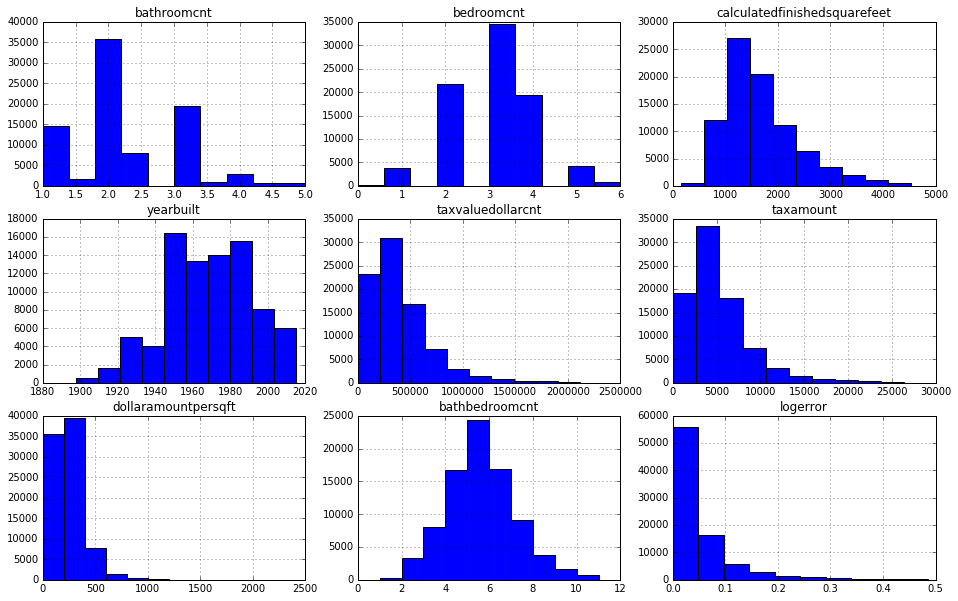

In [ ]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount','dollaramountpersqft','bathbedroomcnt', 'logerror']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]  
    plt.subplot(3, 3, plot_number)
    plt.title(col)
    series.hist(density=False, cumulative=False, log=False)

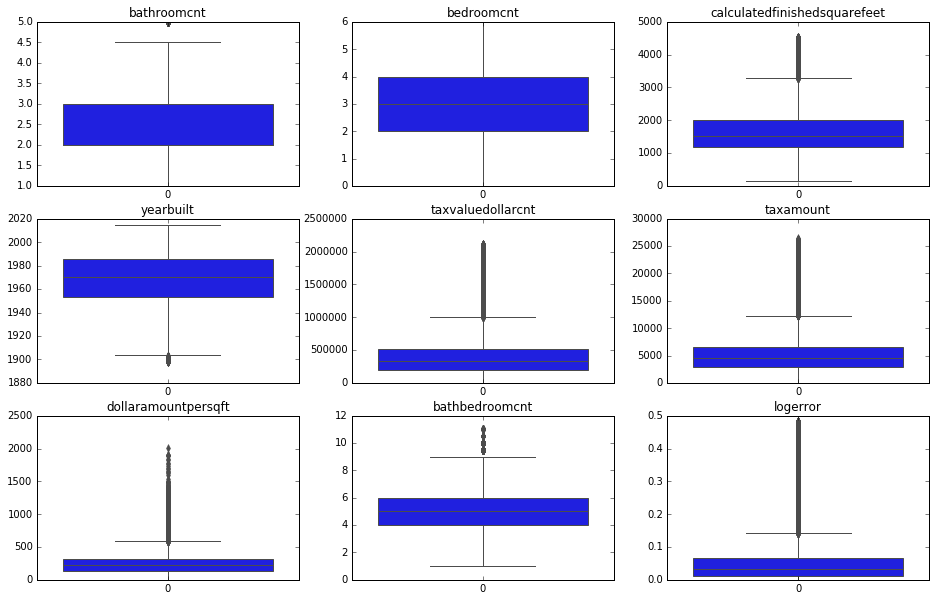

In [ ]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount','dollaramountpersqft','bathbedroomcnt', 'logerror']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]  
    plt.subplot(3, 3, plot_number)
    plt.title(col)
    sns.boxplot(data=series)


#### BONUS:  Data standardization 
Create a new data frame that is the min-max normalization of the independent variable in the original data frame (+ the original dependent variable). You will normalize each of the numeric independent variables independently, i.e. using the min and max of each variable, not the min/max of the whole dataframe. Why? Regression is very sensitive to difference in units. It will be almost impossible to extract a meaningful linear regression model with such extreme differences in scale. For more context, see: https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc
You will use this dataframe in the future analysis.

In [ ]:
# when we apply it to our test data, we use the min and max from our train data. do with pandas

### Data Exploration

Goal is to address each of the questions you posed in your planning & brainstorming through visual or statistical analysis.

When you have completed this step, you will have the findings from your analysis that will be used in your final report, the answers to your questions and your customer's questions that will reach the goal. 

#### Split data into training and test datasets

In [ ]:
X = df.drop(['logerror'], axis=1)
y= df[['logerror']]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.80, random_state=0)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)



/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [ ]:
if X_train.shape[0] == y_train.shape[0]:
    print('X & y train rows ARE equal')
else:
    print('X & y train rows ARE NOT equal')
    
if X_test.shape[0] == y_test.shape[0]:
    print('X & y test rows ARE equal')
else:
    print('X & y test rows ARE NOT equal')
    
if train.shape[1] == test.shape[1]:
    print('Number of columns in train & test ARE equal')
else:
    print('Number of columns in train & test ARE NOT equal')

train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


#### Create a jointplot for each independent variable (normalized version) with the dependent variable. 

Be sure you have Pearson's r and p-value annotated on each plot.

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWa

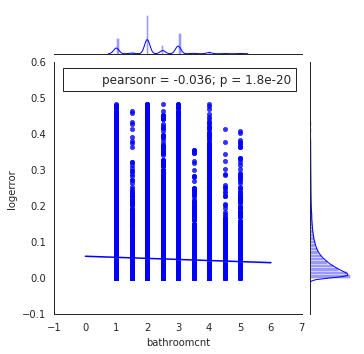

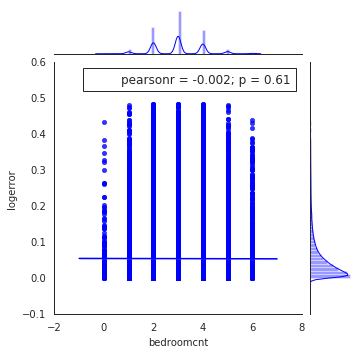

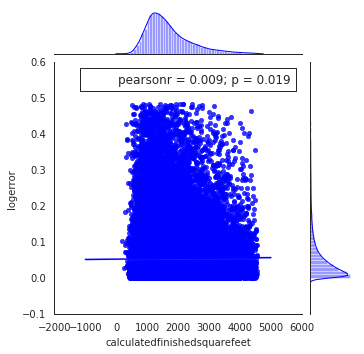

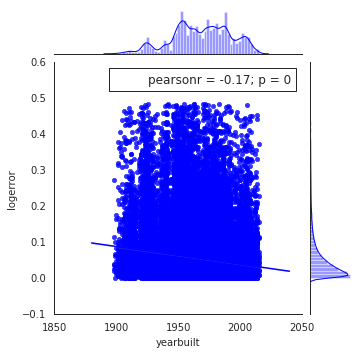

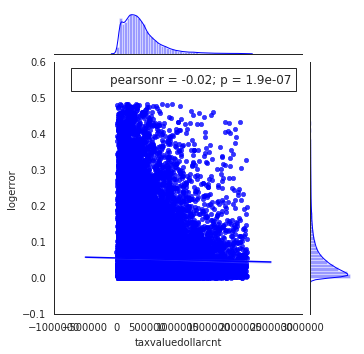

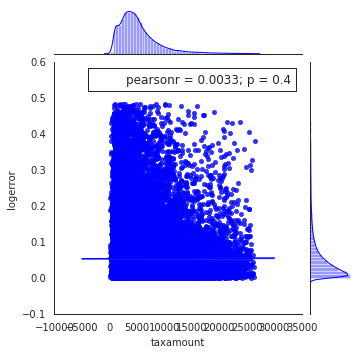

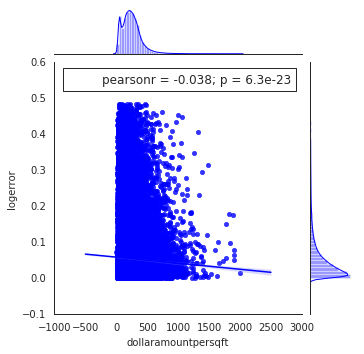

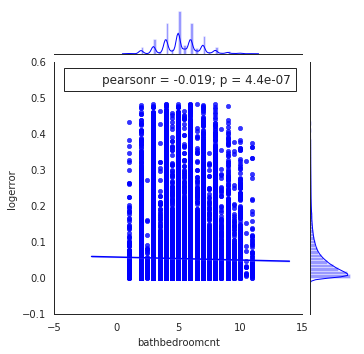

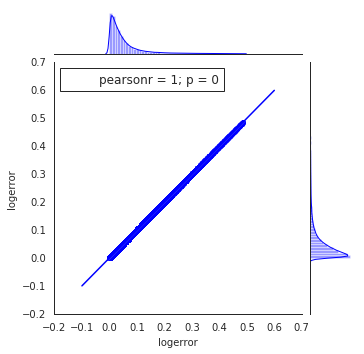

In [ ]:
for col in train:
    with sns.axes_style('white'):
        j = sns.jointplot(col, "logerror", data=train, kind='reg', height=5);
        j.annotate(stats.pearsonr)
plt.show()

#### Create a feature plot using seaborn's PairGrid() of the interaction between each variable (dependent + independent). 

You may want to use a normalized dataframe (if you did that) or adjust the axis scale (set to logarithmic, e.g) so you can more clearly view the interactions.

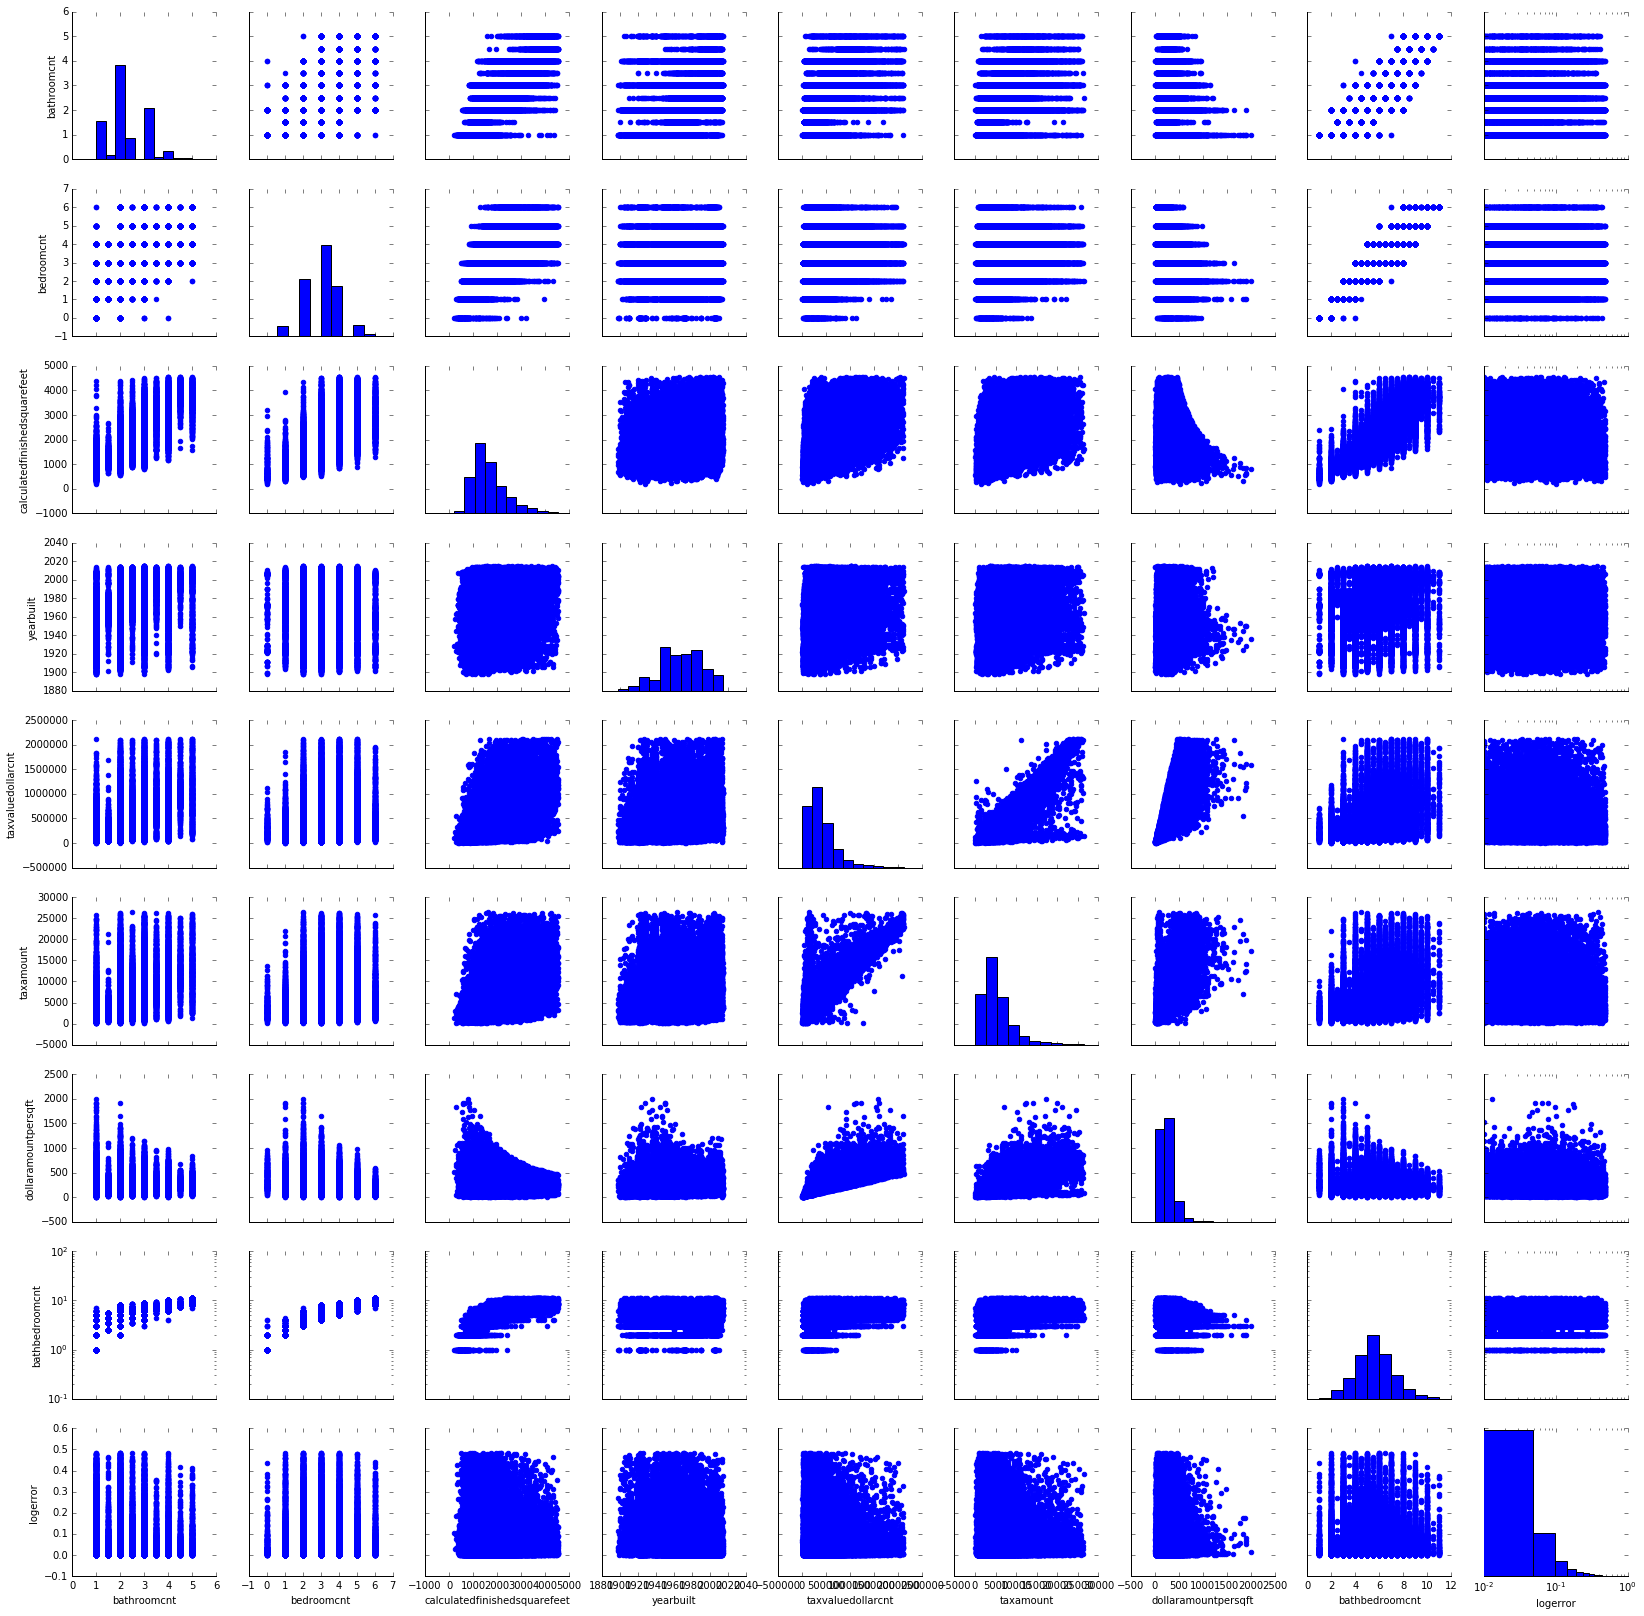

In [ ]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.xscale('log')
plt.yscale('log')
plt.show()

#### Create a heatmap of the correlation between each variable pair.

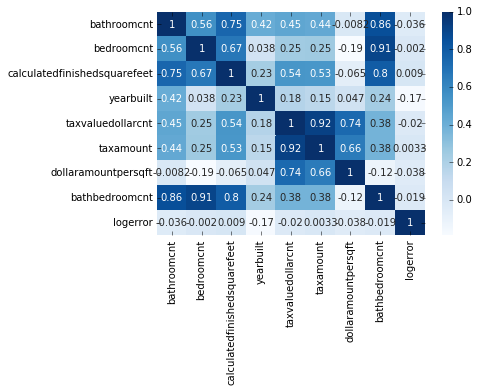

In [ ]:
sns.heatmap(train.corr(), cmap='Blues', annot=True)

In [ ]:
bins = [1880, 1900, 1920, 1940, 1960, 1980, 2000, 2020]
df['binned'] = pd.cut(df['yearbuilt'], bins)

bins = [1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels = ['1900-1920','1920-1940','1940-1960','1960-1980','1980-2000','2000-2020']
df['binned'] = pd.cut(df['yearbuilt'], bins=bins, labels=labels)

df1 = df.groupby('binned')['logerror'].mean()
df1
# df.plt.bar(x='binned', y='logerror', rot=0)

# plt.scatter(df.logerror, df_bin_yearbuilt )


binned
1900-1920    0.089773
1920-1940    0.077377
1940-1960    0.060270
1960-1980    0.050021
1980-2000    0.042949
2000-2020    0.041698
Name: logerror, dtype: float64

#### Summarize your conclusions from all of these steps.  

In [ ]:
# The variables that are the strongest correlated with logerror are calculatedfinishedsquarefeet bathroomcnt, and yearbuilt.


#### Is the logerror significantly different for homes with 3 bedrooms vs those with 5 or more bedrooms? 
Run a t-test to test this difference.

In [ ]:
from scipy.stats import pearsonr, ttest_ind

group1_bedroom3 = df.where(df.bedroomcnt == 3).dropna()
group2_bedroom5 = df.where(df.bedroomcnt >= 5).dropna()

ttest_ind(group1_bedroom3.logerror, group2_bedroom5.logerror)

#### Do the same for another 2 samples you are interested in comparing (e.g. those with 1 bath vs. x baths)

In [ ]:
group1_bathroom2 = df.where(df.bathroomcnt <= 2).dropna()
group2_bathroom3 = df.where(df.bathroomcnt >= 3).dropna()

ttest_ind(group1_bathroom2.logerror, group2_bathroom3.logerror)

# Data Modeling

#### Fit, predict (in-sample) & evaluate multiple linear regression models to find the best one.

- Make any changes as necessary to improve your model.

- Identify the best model after all training

- Compare the models by plotting the predictions of each model with actual values (see plot right above section 12 in 'Regression in Python' lesson

(the predictions are a 1 x 83 two dimensional matrix, but we want just a single array of predictions. We can use the .ravel method to achieve this.)

`pd.DataFrame({'actual': y_train.final_grade,  
              'lm1': y_pred_lm1.ravel(),  
              'lm2': y_pred_lm2.ravel()})\  
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\  
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')  

plt.plot([60, 100], [60, 100], c='black', ls=':')  
plt.ylim(60, 100)  
plt.xlim(60, 100)  
plt.title('Predicted vs Actual Final Grade')`  

#### Predict & evaluate on out-of-sample data (test)    

- Plot the residuals from your out-of-sample predictions.

- Summarize your expectations about how you estimate this model will perform in production.

# Feature Engineering & Selection

## Are there new features you could create based on existing features that might be helpful? Come up with at least one possible new feature that is a calculation from 2+ existing variables.

In [ ]:
# taxvaluedollarcnt / calculatedfinshedsquarefeet = dollaramountpersqft
# bathroomcnt + bedroomcnt = bathbedroomcnt

## Use statsmodels ordinary least squares to assess the importance of each feature with respect to the target

In [ ]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

## Summarize your conclusions and next steps from your analysis in above. What will you try when developing your model? (which features to use/not use/etc)

In [ ]:
# The variables that have a significant correlation with log error are calculatedfinishedsquarefeet, yearbuilt,
# taxvaluedollarcnt, and taxamount. These all have a p-value below 0.05. 

## Train & Test Model

### Linear model 1: dollaramountsqft

In [ ]:
lm1 = LinearRegression()
print(lm1)

In [ ]:
lm1.fit(X_train[['dollaramountpersqft']], y_train)
print(lm1)

lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)

In [ ]:
print('Univariate - logerror = b + m * dollaramountpersqft')
print('    y-intercept (b): %.2f' % lm1_y_intercept)
print('    coefficient (m): %.2f' % lm1_coefficients[0])
print()

In [ ]:
y_pred_lm1 = lm1.predict(X_train[['dollaramountpersqft']])

In [ ]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("lm1\n  mse: {:.3}".format(mse_lm1))

In [ ]:
r2_lm1 = r2_score(y_train, y_pred_lm1)

print('  {:.2%} of the variance in the log error can be explained by the dollar amount per square footage.'.format(r2_lm1))

### Linear model 2: bathbedroomcnt

In [ ]:
lm2 = LinearRegression()
print(lm2)

In [ ]:
lm2.fit(X_train[['bathbedroomcnt']], y_train)
print(lm2)

In [ ]:
lm2_y_intercept = lm2.intercept_
print(lm2_y_intercept)

lm2_coefficients = lm2.coef_
print(lm2_coefficients)

In [ ]:
print('Univariate - logerror = b + m1 * bathbedroomcnt')
print('    y-intercept  (b): %.2f' % lm2_y_intercept)
print('    coefficient (m1): %.2f' % lm2_coefficients[0][0])

In [ ]:
y_pred_lm2 = lm2.predict(X_train[['bathbedroomcnt']])

In [ ]:
mse_lm2 = mean_squared_error(y_train, y_pred_lm2)
print("lm2\n  mse: {:.3}".format(mse_lm2)) 

In [ ]:
r2_lm2 = r2_score(y_train, y_pred_lm2)
print('  {:.2%} of the variance in the log error can be explained by the bathbedroomcnt.'.format(r2_lm2))

### Linear model 3: yearbuilt

In [ ]:
lm3 = LinearRegression()
print(lm3)

In [ ]:
lm3.fit(X_train[['yearbuilt']], y_train)
print(lm3)

In [ ]:
lm3_y_intercept = lm3.intercept_
print(lm3_y_intercept)

lm3_coefficients = lm3.coef_
print(lm3_coefficients)

In [ ]:
print('Univariate - logerror = b + m1 * yearbuilt')
print('    y-intercept  (b): %.2f' % lm3_y_intercept)
print('    coefficient (m1): %.2f' % lm3_coefficients[0][0])

In [ ]:
y_pred_lm3 = lm3.predict(X_train[['yearbuilt']])

In [ ]:
mse_lm3 = mean_squared_error(y_train, y_pred_lm3)
print("lm3\n  mse: {:.3}".format(mse_lm3)) 

In [ ]:
r2_lm3 = r2_score(y_train, y_pred_lm3)
print('  {:.2%} of the variance in the log error can be explained by the yearbuilt.'.format(r2_lm3))

### Linear model 4: bathroomcnt

In [ ]:
lm4 = LinearRegression()
print(lm4)

In [ ]:
lm4.fit(X_train[['bathroomcnt']], y_train)
print(lm4)

In [ ]:
lm4_y_intercept = lm4.intercept_
print(lm4_y_intercept)

lm4_coefficients = lm4.coef_
print(lm4_coefficients)

In [ ]:
print('Univariate - logerror = b + m1 * bathroomcnt')
print('    y-intercept  (b): %.2f' % lm4_y_intercept)
print('    coefficient (m1): %.2f' % lm4_coefficients[0][0])

In [ ]:
y_pred_lm4 = lm4.predict(X_train[['bathroomcnt']])

In [ ]:
mse_lm4 = mean_squared_error(y_train, y_pred_lm4)
print("lm4\n  mse: {:.3}".format(mse_lm4)) 

In [ ]:
r2_lm4 = r2_score(y_train, y_pred_lm4)
print('  {:.2%} of the variance in the log error can be explained by the bathroomcnt.'.format(r2_lm4))

### Linear model 5: bedroomcnt

In [ ]:
lm5 = LinearRegression()
print(lm5)

In [ ]:
lm5.fit(X_train[['bedroomcnt']], y_train)
print(lm5)

In [ ]:
lm5_y_intercept = lm5.intercept_
print(lm5_y_intercept)

lm5_coefficients = lm5.coef_
print(lm5_coefficients)

In [ ]:
print('Univariate - logerror = b + m1 * bedroomcnt')
print('    y-intercept  (b): %.2f' % lm5_y_intercept)
print('    coefficient (m1): %.2f' % lm5_coefficients[0][0])

In [ ]:
y_pred_lm5 = lm5.predict(X_train[['bedroomcnt']])

In [ ]:
mse_lm5 = mean_squared_error(y_train, y_pred_lm5)
print("lm5\n  mse: {:.3}".format(mse_lm5)) 

In [ ]:
r2_lm5 = r2_score(y_train, y_pred_lm5)
print('  {:.2%} of the variance in the log error can be explained by the bedroomcnt.'.format(r2_lm5))

### Linear model 6: calculatedfinishedsquarefeet

In [ ]:
lm6 = LinearRegression()
print(lm6)

In [ ]:
lm6.fit(X_train[['calculatedfinishedsquarefeet']], y_train)
print(lm6)

In [ ]:
lm6_y_intercept = lm6.intercept_
print(lm6_y_intercept)

lm6_coefficients = lm6.coef_
print(lm6_coefficients)

In [ ]:
print('Univariate - logerror = b + m1 * calculatedfinishedsquarefeet')
print('    y-intercept  (b): %.2f' % lm6_y_intercept)
print('    coefficient (m1): %.2f' % lm6_coefficients[0][0])

In [ ]:
y_pred_lm6 = lm6.predict(X_train[['calculatedfinishedsquarefeet']])

In [ ]:
mse_lm6 = mean_squared_error(y_train, y_pred_lm6)
print("lm6\n  mse: {:.3}".format(mse_lm6)) 

In [ ]:
r2_lm6 = r2_score(y_train, y_pred_lm6)
print('  {:.2%} of the variance in the log error can be explained by the calculatedfinishedsquarefeet.'.format(r2_lm6))

### Linear model 7: taxvaluedollarcnt

In [ ]:
lm7 = LinearRegression()
print(lm7)

In [ ]:
lm7.fit(X_train[['taxvaluedollarcnt']], y_train)
print(lm7)

In [ ]:
lm7_y_intercept = lm7.intercept_
print(lm7_y_intercept)

lm7_coefficients = lm7.coef_
print(lm7_coefficients)

In [ ]:
print('Univariate - logerror = b + m1 * taxvaluedollarcnt')
print('    y-intercept  (b): %.2f' % lm7_y_intercept)
print('    coefficient (m1): %.2f' % lm7_coefficients[0][0])

In [ ]:
y_pred_lm7 = lm7.predict(X_train[['taxvaluedollarcnt']])

In [ ]:
mse_lm7 = mean_squared_error(y_train, y_pred_lm7)
print("lm7\n  mse: {:.3}".format(mse_lm7)) 

In [ ]:
r2_lm7 = r2_score(y_train, y_pred_lm7)
print('  {:.2%} of the variance in the log error can be explained by the taxvaluedollarcnt.'.format(r2_lm7))

### Linear model 8: taxamount

In [ ]:
lm8 = LinearRegression()
print(lm8)

In [ ]:
lm8.fit(X_train[['taxamount']], y_train)
print(lm8)

In [ ]:
lm8_y_intercept = lm8.intercept_
print(lm8_y_intercept)

lm8_coefficients = lm8.coef_
print(lm8_coefficients)

In [ ]:
print('Univariate - logerror = b + m1 * taxamount')
print('    y-intercept  (b): %.2f' % lm8_y_intercept)
print('    coefficient (m1): %.2f' % lm8_coefficients[0][0])

In [ ]:
y_pred_lm8 = lm8.predict(X_train[['taxamount']])

In [ ]:
mse_lm8 = mean_squared_error(y_train, y_pred_lm8)
print("lm8\n  mse: {:.3}".format(mse_lm8)) 

In [ ]:
r2_lm8 = r2_score(y_train, y_pred_lm8)
print('  {:.2%} of the variance in the log error can be explained by the taxamount.'.format(r2_lm8))

### Linear model 9: calculatedfinishedsquarefeet & bathbedroomcnt

In [ ]:
lm9 = LinearRegression()
print(lm9)

In [ ]:
lm9.fit(X_train[['calculatedfinishedsquarefeet', 'yearbuilt']], y_train)
print(lm9)

In [ ]:
lm9_y_intercept = lm9.intercept_
print(lm9_y_intercept)

lm9_coefficients = lm9.coef_
print(lm9_coefficients)

In [ ]:
print('Multivariate - logerror = b + m1 * calculatedfinishedsquarefeet + m2 * yearbuilt')
print('    y-intercept  (b): %.2f' % lm9_y_intercept)
print('    coefficient (m1): %.2f' % lm9_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm9_coefficients[0][1])

In [ ]:
y_pred_lm9 = lm9.predict(X_train[['calculatedfinishedsquarefeet', 'yearbuilt']])

In [ ]:
mse_lm9 = mean_squared_error(y_train, y_pred_lm9)
print("lm9\n  mse: {:.3}".format(mse_lm9)) 

In [ ]:
r2_lm9 = r2_score(y_train, y_pred_lm9)
print('  {:.2%} of the variance in the log error can be explained by calculatedfinishedsquarefeet and yearbuilt'.format(r2_lm9))


### Make predictions using the testing set

In [ ]:
y_pred_lm9 = lm9.predict(X_test[['calculatedfinishedsquarefeet', 'yearbuilt']])

In [ ]:
mse = mean_squared_error(y_test, y_pred_lm9)

print("Mean squared error: %.2f" % mse)

In [ ]:
r2 = r2_score(y_test, y_pred_lm9)

print('{:.2%} of the variance in log error can be explained by calculatedfinishedsquarefeet and yearbuilt.'
      .format(r2))

In [ ]:
plt.scatter(y_pred_lm9, y_pred_lm9 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=-5, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

In [ ]:
y_pred_lm8 = lm8.predict(X_test[['taxamount']])

In [ ]:
mse = mean_squared_error(y_test, y_pred_lm8)

print("Mean squared error: %.2f" % mse)

In [ ]:
r2 = r2_score(y_test, y_pred_lm8)

print('{:.2%} of the variance in log error can be explained by taxamount.'
      .format(r2))

In [ ]:
plt.scatter(y_pred_lm8, y_pred_lm8 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=-5, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

In [ ]:
y_pred_lm7 = lm7.predict(X_test[['taxvaluedollarcnt']])

In [ ]:
mse = mean_squared_error(y_test, y_pred_lm7)

print("Mean squared error: %.2f" % mse)

In [ ]:
r2 = r2_score(y_test, y_pred_lm7)

print('{:.2%} of the variance in log error can be explained by taxvaluedollarcnt.'
      .format(r2))

In [ ]:
plt.scatter(y_pred_lm7, y_pred_lm7 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=-5, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

In [ ]:
y_pred_lm6 = lm6.predict(X_test[['calculatedfinishedsquarefeet']])

In [ ]:
mse = mean_squared_error(y_test, y_pred_lm6)

print("Mean squared error: %.2f" % mse)

In [ ]:
r2 = r2_score(y_test, y_pred_lm6)

print('{:.2%} of the variance in log error can be explained by calculatedfinishedsquarefeet.'
      .format(r2))

In [ ]:
plt.scatter(y_pred_lm6, y_pred_lm6 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=-5, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

In [ ]:
y_pred_lm5 = lm5.predict(X_test[['bedroomcnt']])

In [ ]:
mse = mean_squared_error(y_test, y_pred_lm5)

print("Mean squared error: %.2f" % mse)

In [ ]:
r2 = r2_score(y_test, y_pred_lm5)

print('{:.2%} of the variance in log error can be explained by bedroomcnt.'
      .format(r2))

In [ ]:
plt.scatter(y_pred_lm5, y_pred_lm5 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=-5, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

In [ ]:
y_pred_lm4 = lm4.predict(X_test[['bathroomcnt']])

In [ ]:
mse = mean_squared_error(y_test, y_pred_lm4)

print("Mean squared error: %.2f" % mse)

In [ ]:
r2 = r2_score(y_test, y_pred_lm4)

print('{:.2%} of the variance in log error can be explained by bathroomcnt.'
      .format(r2))

In [ ]:
plt.scatter(y_pred_lm4, y_pred_lm4 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=-5, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

In [ ]:
y_pred_lm3 = lm3.predict(X_test[['yearbuilt']])

In [ ]:
mse = mean_squared_error(y_test, y_pred_lm3)

print("Mean squared error: %.2f" % mse)

In [ ]:
r2 = r2_score(y_test, y_pred_lm3)

print('{:.2%} of the variance in log error can be explained by yearbuilt.'
      .format(r2))

In [ ]:
plt.scatter(y_pred_lm3, y_pred_lm3 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=-5, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

In [ ]:
y_pred_lm2 = lm2.predict(X_test[['bathbedroomcnt']])

In [ ]:
mse = mean_squared_error(y_test, y_pred_lm2)

print("Mean squared error: %.2f" % mse)

In [ ]:
r2 = r2_score(y_test, y_pred_lm2)

print('{:.2%} of the variance in log error can be explained by bathbedroomcnt.'
      .format(r2))

In [ ]:
plt.scatter(y_pred_lm2, y_pred_lm2 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=-5, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

In [ ]:
y_pred_lm1 = lm1.predict(X_test[['dollaramountpersqft']])

In [ ]:
mse = mean_squared_error(y_test, y_pred_lm1)

print("Mean squared error: %.2f" % mse)

In [ ]:
r2 = r2_score(y_test, y_pred_lm1)

print('{:.2%} of the variance in log error can be explained by dollaramountpersqft.'
      .format(r2))

In [ ]:
plt.scatter(y_pred_lm1, y_pred_lm1 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=-5, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')